# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [35]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_clipboard() #.set_index('StudentID')
df

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

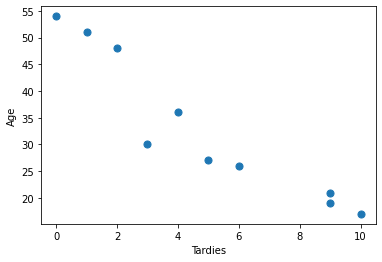

In [17]:
df.plot.scatter(x = 'Tardies', y = 'Age', s = 50);

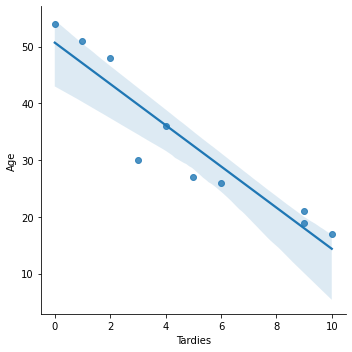

In [19]:
sns.lmplot(x='Tardies', y='Age', data=df, fit_reg=True);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Sí, Que a menor edad, más tardanza. Parece que hay cierta relación lineal.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [25]:
df[['Age','Tardies']].cov() 

# Esto explica cuando cae la tardanza por cada año de edad que variamos. 
#Por cada +1 en edad, -45.5 en Tardanza

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [26]:
df[['Age','Tardies']].corr() 

# Hay una clara correlación negativa entre Edad y Tardanza, bastante elevada además.
# Por cada 1 que sube edad, tardanza cae un 93'9%

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [30]:
x=sm.add_constant(df.Tardies)

y=df.Age

modelo=sm.OLS(y, x).fit()

In [31]:
pred=modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           5.57e-05
Time:                        15:48:41   Log-Likelihood:                -29.149
No. Observations:                  10   AIC:                             62.30
Df Residuals:                       8   BIC:                             62.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.6988      2.791     18.168      0.000      44.264      57.134
Tardies       -3.6324      0.470     -7.734      0.000      -4.716      -2.549
==============================================================================
Omnibus:                        3.472   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                1.714
Skew:                          -1.010   Prob(JB):                        0.424
Kurtosis:                       2.812   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

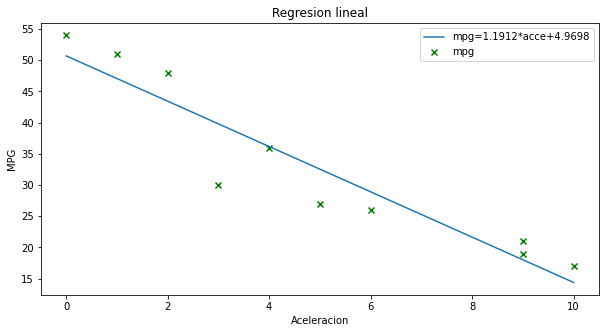

In [33]:
# plot

x=np.linspace(df.Tardies.min(), df.Tardies.max(), 50)
y=(-3.6324)*x + 50.6988

plt.figure(figsize=(10, 5))

# la recta de ajuste
plt.plot(x, y, label='mpg={}*acce+{}'.format(1.1912, 4.9698))

# datos
plt.scatter(df.Tardies, df.Age, marker='x', c='g', label='mpg')

plt.title('Regresion lineal')
plt.xlabel('Aceleracion')
plt.ylabel('MPG')
plt.legend()
plt.show();

# Usamos regresión lineal porque vimos que hay una correlación lineal entre las variables.

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Que hay una clara relación lineal, sí sería un buen indicador.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [36]:
df = pd.read_csv('./vehicles.csv')
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [40]:
vip_cols = ['Year', 'Cylinders', 'Fuel Barrels/Year','Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']

df[vip_cols].corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


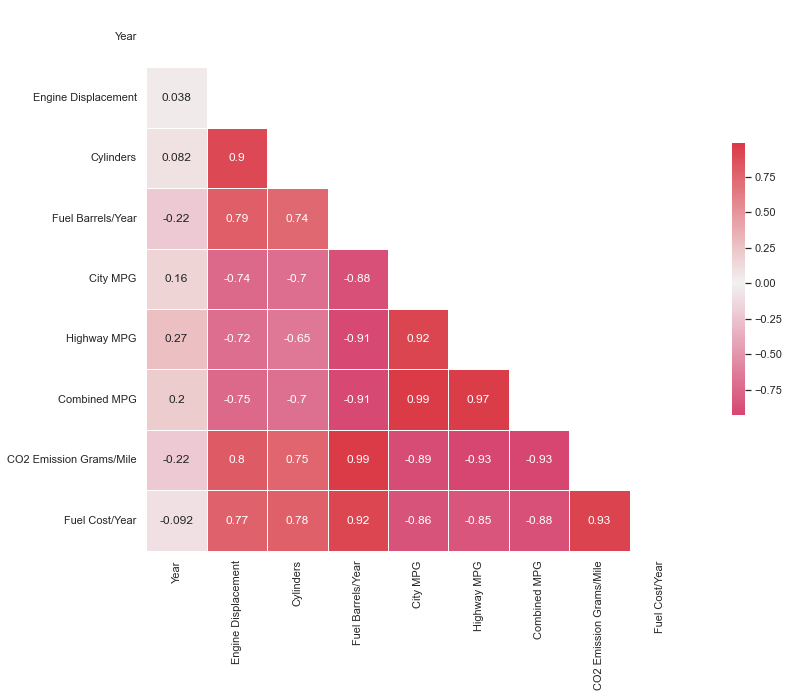

In [42]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(df.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df.corr(),
          mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [44]:
from sklearn.linear_model import LinearRegression as LinReg

df=df.dropna()
X=df.drop('CO2 Emission Grams/Mile', axis=1)._get_numeric_data()
y=df['CO2 Emission Grams/Mile']

linreg=LinReg().fit(X, y)

dict(zip(X.columns, linreg.coef_))

{'Year': -0.3065771721977052,
 'Engine Displacement': 6.659331237503194,
 'Cylinders': -1.1563381548802825,
 'Fuel Barrels/Year': 17.450688132219792,
 'City MPG': 0.8705547213225833,
 'Highway MPG': -2.4132209128529456,
 'Combined MPG': -1.3729550525961103,
 'Fuel Cost/Year': 0.03757824918671826}

In [45]:
from sklearn.preprocessing import StandardScaler

X_norm=StandardScaler().fit_transform(X)

linreg=LinReg().fit(X_norm, y)

dict(zip(X.columns, linreg.coef_))

{'Year': -3.0918765500334757,
 'Engine Displacement': 9.052538259826413,
 'Cylinders': -2.0296554005550664,
 'Fuel Barrels/Year': 77.95607276562336,
 'City MPG': 4.151921383653827,
 'Highway MPG': -14.215788307323443,
 'Combined MPG': -7.019010073073915,
 'Fuel Cost/Year': 19.050352681454946}

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [47]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [51]:
# varias variables

x=sm.add_constant(df[[
    
    #'Year',
    'Engine Displacement',
    #'Cylinders',
    'Fuel Barrels/Year',
    #'City MPG',
    #'Highway MPG',
    #'Combined MPG',
    #'Fuel Cost/Year'
    
    
]].apply(lambda x: x.fillna(x.mean()))

)

y=df['CO2 Emission Grams/Mile']

modelo=sm.OLS(y, x).fit()

pred=modelo.predict(x)

modelo.summary()

# Todas las variables tienen importancia (Pvalor 0). La de mayor peso es Fuel Barrels/Year, seguida de Engine Displacement.

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.974
Model:                                 OLS   Adj. R-squared:                  0.974
Method:                      Least Squares   F-statistic:                 6.783e+05
Date:                     Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                             16:17:26   Log-Likelihood:            -1.5712e+05
No. Observations:                    35952   AIC:                         3.142e+05
Df Residuals:                        35949   BIC:                         3.143e+05
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  17.6172      0.424     41.522      0.000      16.786      18.449
Engine Displacement     5.7432      0.121     47.469      0.000       5.506       5.980
Fuel Barrels/Year      24.9034      0.037    676.414      0.000      24.831      24.976
==============================================================================
Omnibus:                    85106.861   Durbin-Watson:                   0.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        746501949.219
Skew:                          24.215   Prob(JB):                         0.00
Kurtosis:                     707.263   Cond. No.                         78.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 